# **PHASE I**

# **Introduction**

So today I am gonna work on **students performance** dataset. We will predict sudents performance based on the features we have 8 columns.


1.  gender
1.  race/ethnicity
2.  parental level of education
1.  lunch
2.  test preparation course
1.  math score
2.  reading score
1.  writing score

# **Importing libraries**

In [1]:
# Importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

# **Lets take a look at the dataset**

In [3]:
# no of cols
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# for checking missing values
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [ ]:
# making categorical and numerical columns
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']

In [ ]:
# correlation between numerical columns
df[num_cols].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# **EDA**

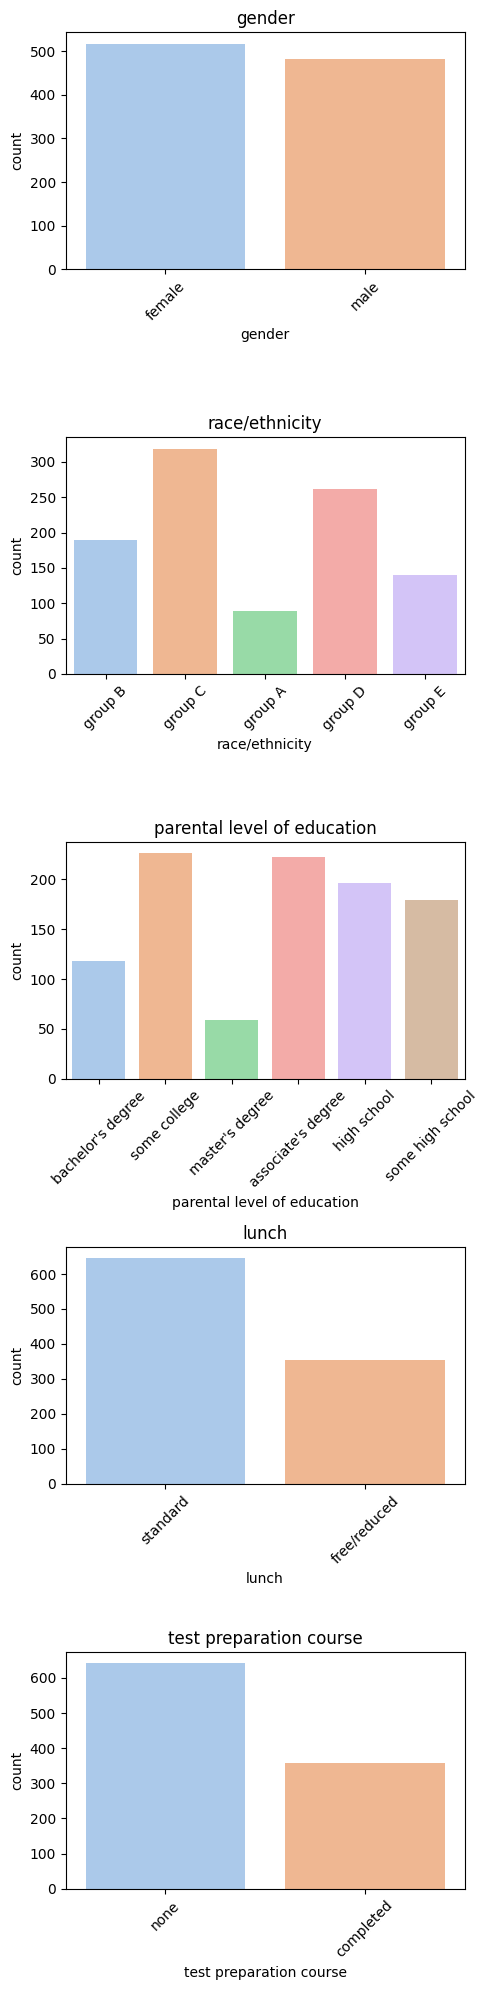

In [ ]:
# Making multiple count plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5,20))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


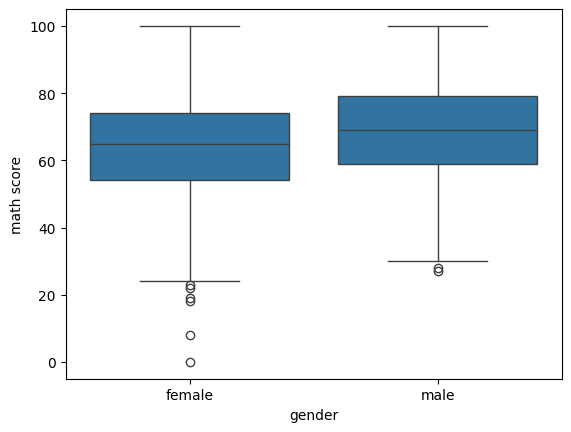

In [ ]:
# box plot on gender and math score
sns.boxplot(x='gender', y='math score', data=df)
plt.show()

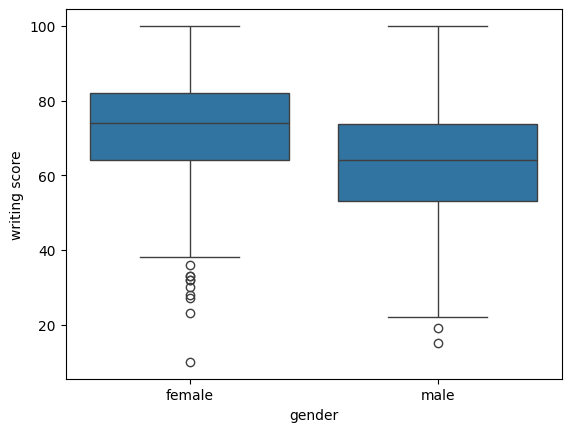

In [ ]:
# box plot on gender and writing score
sns.boxplot(x='gender', y='writing score', data=df)
plt.show()

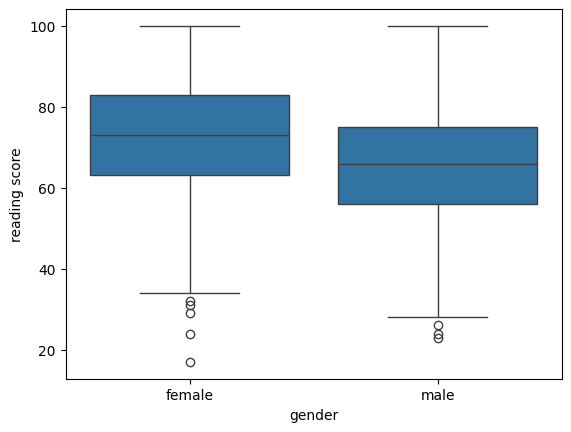

In [ ]:
# box plot on gender and reading score
sns.boxplot(x='gender', y='reading score', data=df)
plt.show()

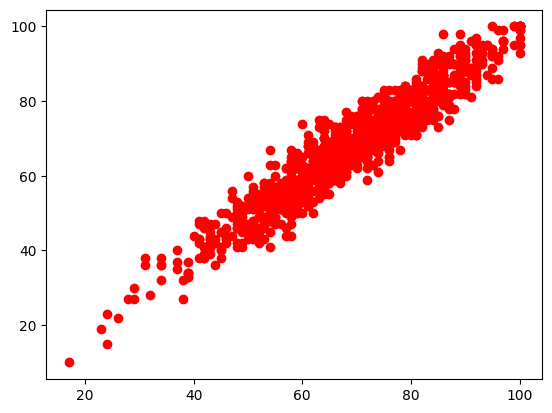

In [ ]:
# scatter plot
plt.scatter(x='reading score', y='writing score', data=df, c='red')

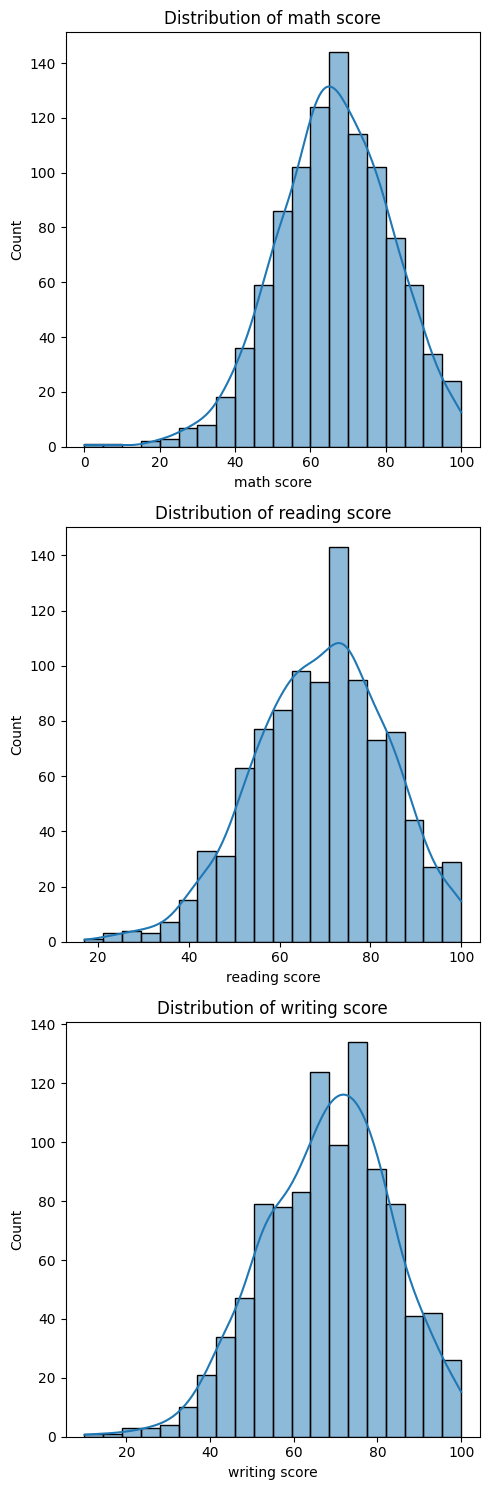

In [ ]:
# Creating multiple histplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 15))

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

<Axes: xlabel='lunch', ylabel='reading score'>

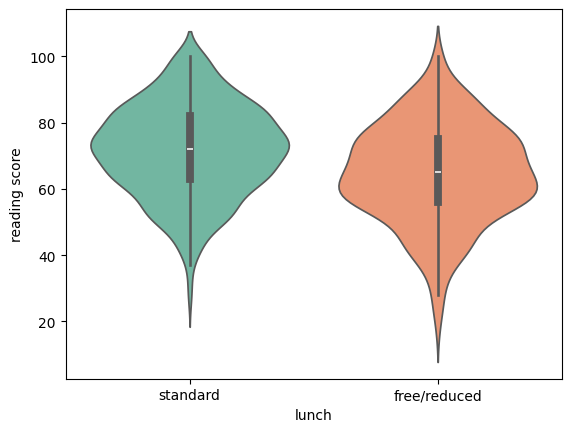

In [ ]:
# creating violin plots
sns.violinplot(x='lunch', y='reading score', data=df, palette='Set2')

<Axes: xlabel='gender', ylabel='writing score'>

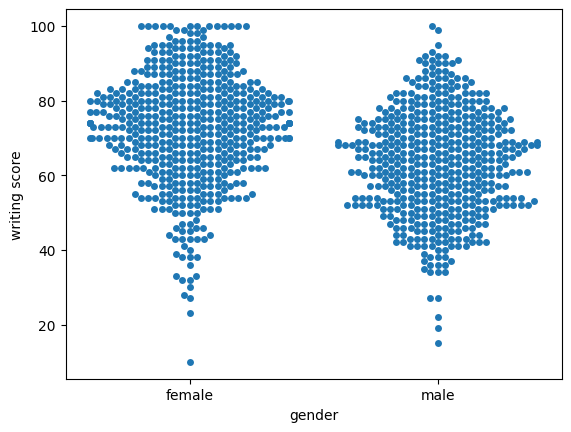

In [ ]:
# swarm plot
sns.swarmplot(x='gender', y='writing score', data=df)

<Axes: xlabel='gender', ylabel='math score'>

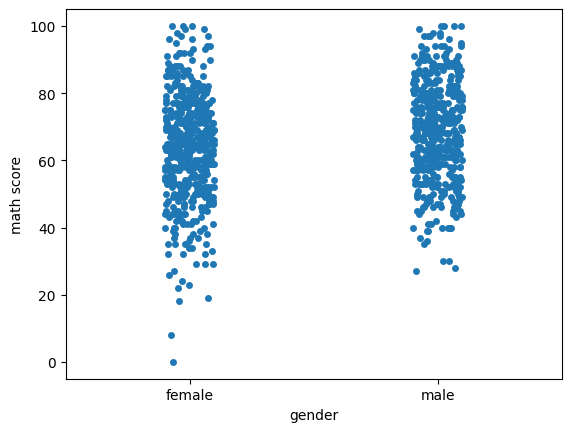

In [ ]:
#strip plot
sns.stripplot(x='gender', y='math score', data=df, jitter=True)

<Axes: xlabel='test preparation course', ylabel='reading score'>

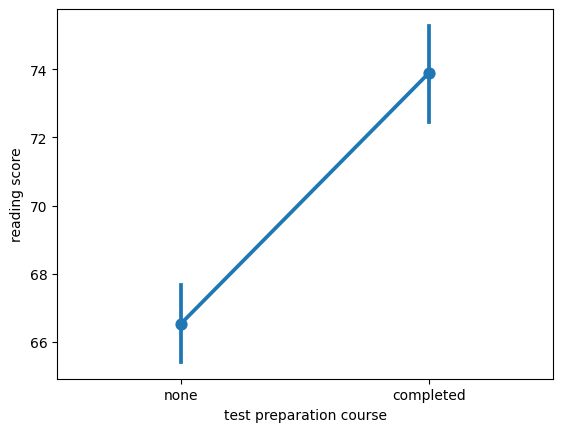

In [ ]:
# point plot
sns.pointplot(x='test preparation course', y='reading score', data=df)

In [ ]:
# encoding dataset for heatmap
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()
le = LabelEncoder()
for col in encoded_df.select_dtypes(include='object').columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

<Axes: >

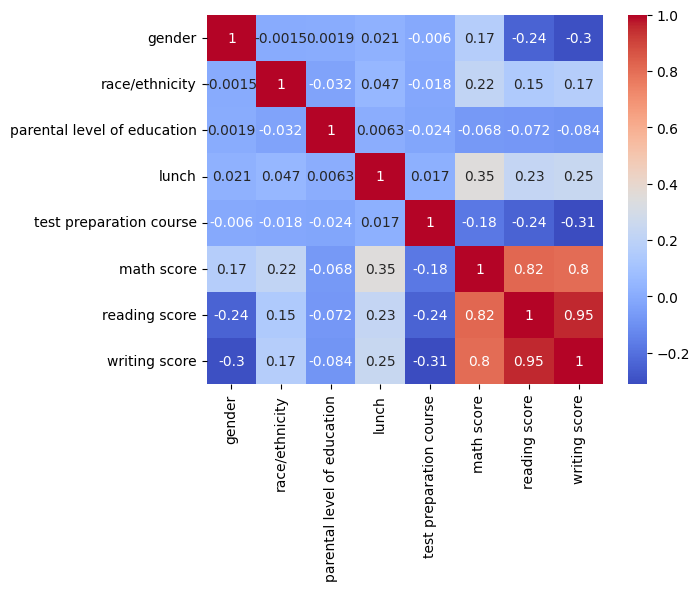

In [ ]:
# creating heatmap
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')

# **PHASE II**

In [ ]:
# making a new column for all scores
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

<Axes: ylabel='total_score'>

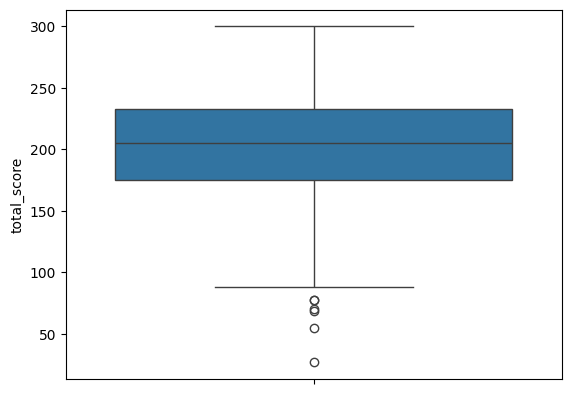

In [ ]:
# box plot
sns.boxplot(df['total_score'])

In [ ]:
# clipping the scores
df['total_score_clipped'] = df['total_score'].clip(lower=80, upper=300)

In [ ]:
# there no need of this column now as it will only cause problem
df.drop(['total_score'], axis=1, inplace=True)

In [ ]:
df['total_score_clipped']

,total_score
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [ ]:
# Splitting into X and
X = df.drop('total_score_clipped', axis=1)
y = df['total_score_clipped']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total_score_clipped
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [ ]:
# creating order for Ordinal encoding so that it could understand order
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

In [ ]:
# Applying ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[education_order])

X_train['parental level of education'] = encoder.fit_transform(X_train[['parental level of education']])
X_test['parental level of education'] = encoder.transform(X_test[['parental level of education']])

In [ ]:
# creating order for Ordinal encoding
test_prep_order = ['none','completed']

In [ ]:
# applying ordinal encoding once more
encoder2 = OrdinalEncoder(categories=[test_prep_order])
X_train['test preparation course'] = encoder2.fit_transform(X_train[['test preparation course']])
X_test['test preparation course'] = encoder2.fit_transform(X_test[['test preparation course']])

In [ ]:
# Applying one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe_cols = ['gender', 'race/ethnicity', 'lunch']

ohe_encoded_train = ohe_encoder.fit_transform(X_train[ohe_cols])
ohe_feature_names = ohe_encoder.get_feature_names_out(ohe_cols)

ohe_encoded_test = ohe_encoder.transform(X_test[ohe_cols])

X_train = pd.concat([X_train.drop(ohe_cols, axis=1), pd.DataFrame(ohe_encoded_train, columns=ohe_feature_names, index=X_train.index)], axis=1)
X_test = pd.concat([X_test.drop(ohe_cols, axis=1), pd.DataFrame(ohe_encoded_test, columns=ohe_feature_names, index=X_test.index)], axis=1)


In [ ]:
# Now lets do scaling before modeling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

,parental level of education,test preparation course,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
29,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
535,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
695,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
557,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
836,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
106,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
270,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
435,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.columns

Index(['parental level of education', 'test preparation course',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'lunch_free/reduced', 'lunch_standard'],
      dtype='object')

# **Model Training**

In [ ]:
# importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# training Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred1 = lin_reg.predict(X_test)

In [ ]:
# Training Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
# Training Random Forest
rf = RandomForestRegressor()   # You can customize parameters if you want
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
# Training K nearest neighbours
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred4 = knn.predict(X_test)

In [ ]:
# Evaluation Time !!!
from sklearn.metrics import mean_squared_error
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred1))
print("Random Forest Regressor MSE:", mean_squared_error(y_test, y_pred2))
print("Decision Tree Regressor MSE:", mean_squared_error(y_test, y_pred3))
print("KNN Regressor MSE:", mean_squared_error(y_test, y_pred4))

Linear Regression MSE: 1513.3027290429588
Random Forest Regressor MSE: 1968.88599138131
Decision Tree Regressor MSE: 1885.5576268765424
KNN Regressor MSE: 1813.0862


# **We just got descent results, these are not that good Ik but yeah I applied a lot of techniques today.**